In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('data_final.csv')
df

,Race_ID,Trap,Odds,BSP,Public_Estimate,Last_Run,Distance_All,Finish_All,Distance_Places_All,Races_All,...,Early_380,Grade_380,Time_380,Early_Time_380,Stay_380,Favourite,Finished,Wide_380,Dist_By,Winner
0,0,6,2.75,4.00,1,12,456.47,4.09,402.86,17,...,2.000000,4.00,17.84,3.63,0.500000,6.0,4,0.000000,-10.50000,0
1,0,3,5.00,7.60,4,5,410.48,3.53,414.00,21,...,3.430000,3.29,24.18,3.70,0.280000,6.0,1,0.140000,-4.71000,1
2,0,5,5.00,9.40,6,9,386.45,3.39,380.00,31,...,3.430000,3.71,24.06,3.67,-0.430000,6.0,3,0.000000,-2.86000,0
3,0,4,7.00,7.80,5,9,380.00,3.03,380.00,21,...,2.430000,4.43,24.14,3.65,0.280000,6.0,2,0.000000,-2.71000,0
4,0,2,5.00,5.10,2,13,385.00,2.59,388.33,40,...,3.140000,2.71,24.05,3.64,-0.430000,6.0,6,0.000000,-2.32000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12001,2000,4,3.50,4.67,3,4,408.19,3.25,383.91,52,...,5.000000,5.71,24.13,3.75,-2.000000,1.0,4,0.000000,-3.50000,0
12002,2000,2,7.00,9.36,6,8,418.62,3.82,412.00,58,...,5.000000,4.86,20.81,3.73,-0.290000,1.0,3,0.000000,-12.43000,0
12003,2000,5,5.00,4.35,2,7,400.00,4.05,410.00,9,...,4.750000,6.00,24.36,3.74,-0.750000,1.0,6,0.000000,-4.75000,0
12004,2000,1,4.00,3.86,1,3,436.36,4.82,442.00,22,...,3.487433,5.71,24.13,3.74,-0.056749,1.0,2,0.068085,-4.48688,0


In [4]:
df = df.dropna()
df = df[['Race_ID', 'Trap','Odds','Winner']]
df

,Race_ID,Trap,Odds,Winner
0,0,6,2.75,0
1,0,3,5.00,1
2,0,5,5.00,0
3,0,4,7.00,0
4,0,2,5.00,0
...,...,...,...,...
12001,2000,4,3.50,0
12002,2000,2,7.00,0
12003,2000,5,5.00,0
12004,2000,1,4.00,0


In [5]:
import numpy as np

input_df = df.drop(['Winner'], axis=1)
input_df

,Race_ID,Trap,Odds
0,0,6,2.75
1,0,3,5.00
2,0,5,5.00
3,0,4,7.00
4,0,2,5.00
...,...,...,...
12001,2000,4,3.50
12002,2000,2,7.00
12003,2000,5,5.00
12004,2000,1,4.00


In [6]:
output_df = df[['Race_ID', 'Trap', 'Winner']]
output_df

,Race_ID,Trap,Winner
0,0,6,0
1,0,3,1
2,0,5,0
3,0,4,0
4,0,2,0
...,...,...,...
12001,2000,4,0
12002,2000,2,0
12003,2000,5,0
12004,2000,1,0


In [7]:
df['Race_ID'][0]

0

In [8]:
def df_to_array_set(df):
    races = []
    current_race = []
    last_race_id = df['Race_ID'][0]
    for index, row in df.iterrows():
        if last_race_id != row['Race_ID']:
            races.append(np.array(current_race))
            last_race_id = row['Race_ID']
            current_race = []
        current_race.append(np.array(row.drop(['Race_ID'])))

    array = np.asarray(races)
    return array

In [20]:
X = df_to_array_set(input_df)
X = X.reshape(1, X.shape[0], -1)[0]
X.shape

(2000, 12)

In [21]:
y = np.array([x.T[1] for x in df_to_array_set(output_df)])
y.shape

(2000, 6)

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(156, 500)  # 5*5 from image dimension
        self.dropout1 = nn.Dropout(0.4)
        self.fc2 = nn.Linear(500, 500)
        self.dropout1 = nn.Dropout(0.4)
        self.fc2 = nn.Linear(500, 84)
        self.dropout2 = nn.Dropout(0.4)
        self.fc3 = nn.Linear(84, 6)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.softmax(self.fc3(x), dim=1)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=4
)

X_train = torch.from_numpy(X_train).float().to(device)
y_train = torch.from_numpy(y_train).float().to(device)
X_test = torch.from_numpy(X_test).float().to(device)
y_test = torch.from_numpy(y_test).float().to(device)

X_train.shape, X_test.shape

(torch.Size([1600, 12]), torch.Size([400, 12]))

In [37]:
model = Net()
model.to(device)

y_arg = [np.argmax(x) for x in y_train.cpu().detach().numpy()]
y_pred_arg = [np.argmax(y_pred) for y_pred in model(X_test).cpu().detach().numpy()]

corrects = [y == y_pred for y, y_pred in zip(y_arg, y_pred_arg)]
accuracy = sum(corrects)/ len(corrects)
accuracy

0.1675

0%, loss = 0.1532692313194275
10%, loss = 0.13483935594558716
20%, loss = 0.13121330738067627
30%, loss = 0.12911130487918854
40%, loss = 0.12911838293075562
50%, loss = 0.12886036932468414
60%, loss = 0.12794846296310425
70%, loss = 0.12640225887298584
80%, loss = 0.1279269903898239
90%, loss = 0.12671686708927155


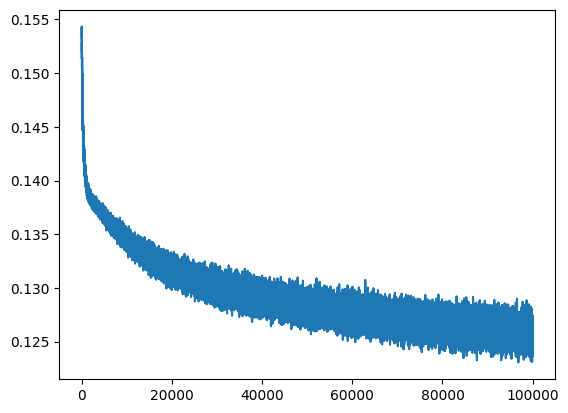

In [38]:
import torch.optim as optim

epochs = 100000
print_epoch = 0.1 * epochs
Loss = []

# create your optimizer
optimizer = optim.Adam(model.parameters(), lr=0.00003)

criterion = nn.MSELoss()
model.train()
for epoch in range(epochs):
    optimizer.zero_grad()   # zero the gradient buffer
    y_pred = model(X_train)
    
    loss = criterion(y_pred, y_train)
    l = loss.cpu().detach().numpy()
    Loss.append(l)
    if epoch % print_epoch == 0:
        print(f"{int(epoch/epochs * 100)}%, loss = {l}")
    # print(y_pred.shape)
    loss.backward()
    optimizer.step()    # Does the update

plt.plot(range(len(Loss)), Loss)

In [39]:
model.eval()
y_arg = [np.argmax(x) for x in y_train.cpu().detach().numpy()]
y_pred_arg = [np.argmax(y_pred) for y_pred in model(X_train).cpu().detach().numpy()]

corrects = [y == y_pred for y, y_pred in zip(y_arg, y_pred_arg)]
accuracy = sum(corrects)/ len(corrects)
accuracy

0.4675

In [40]:
y_arg = [np.argmax(x) for x in y_test.cpu().detach().numpy()]
y_pred_arg = [np.argmax(y_pred) for y_pred in model(X_test).cpu().detach().numpy()]

corrects = [y == y_pred for y, y_pred in zip(y_arg, y_pred_arg)]
accuracy = sum(corrects)/ len(corrects)
accuracy

0.2